# Analyse de Campagne Marketing - Grande Distribution

---

## Contexte et Objectifs

**Client :** Direction Marketing d'une multinationale de la grande distribution

### Objectifs Principaux
1. **Analyser, visualiser et interpréter** les données de campagne marketing
2. **Définir les KPIs pertinents** pour évaluer l'efficacité des campagnes
3. **Prédire la réponse client** aux futures campagnes

### Objectifs Finaux
- Chiffrer l'efficacité des campagnes marketing
- Réaliser des KPIs et fournir des chiffres clés
- Cerner la cible client et comprendre le public ciblé

### Livrables
- Analyses exploratoires complètes
- Modèles prédictifs de réponse client
- Segmentation client (clustering)
- Justification du feature engineering

## Table des Matières

1. **Importation des Bibliothèques**
2. **Chargement et Découverte des Données**
3. **Nettoyage et Prétraitement des Données**
4. **Feature Engineering**
5. **Définition et Calcul des KPIs**
6. **Segmentation Client (Clustering)**
7. **Modélisation Prédictive**
8. **Conclusions et Recommandations**

---
## 1) Importation des Bibliothèques

In [27]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning - Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Machine Learning - Modélisation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Machine Learning - Évaluation
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve
)

# Ignorer les warnings
import warnings 
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Toutes les bibliothèques ont été importées avec succès !")

✅ Toutes les bibliothèques ont été importées avec succès !


---
## 2️) Chargement et Découverte des Données

In [28]:
# Chargement des données
df = pd.read_csv('Camp_Market.csv', sep=';')

print("📊 Dimensions du dataset :")
print(f"   Nombre de lignes : {df.shape[0]}")
print(f"   Nombre de colonnes : {df.shape[1]}")
print("\n" + "="*80 + "\n")

# Affichage des premières lignes
print("📋 Aperçu des données :")
df.head(10)

📊 Dimensions du dataset :
   Nombre de lignes : 2240
   Nombre de colonnes : 29


📋 Aperçu des données :


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,1985,Graduation,Married,70951,0,0,04/05/2013,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,3,11,0
1,1,1961,Graduation,Single,57091,0,0,15/06/2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,0,3,11,1
2,9,1975,Master,Single,46098,1,1,18/08/2012,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,3,11,0
3,13,1947,PhD,Widow,25358,0,1,22/07/2013,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,3,11,0
4,17,1971,PhD,Married,60491,0,1,06/09/2013,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,3,11,0
5,20,1965,2n Cycle,Married,46891,0,1,01/09/2013,91,43,12,23,29,15,61,1,2,1,4,4,0,0,0,0,0,0,3,11,0
6,22,1976,Graduation,Divorced,46310,1,0,03/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,3,11,0
7,24,1960,Master,Together,17144,1,1,15/02/2014,96,18,2,19,0,2,6,5,3,0,4,7,0,0,0,0,0,0,3,11,0
8,25,1958,Graduation,Married,65148,0,1,16/11/2012,9,460,35,422,33,12,153,2,6,6,7,4,0,0,0,0,0,0,3,11,0
9,35,1987,Graduation,Married,25545,1,0,08/09/2012,35,32,1,64,16,12,85,3,2,2,3,6,0,0,0,0,0,0,3,11,1


In [29]:
# Informations générales sur le dataset
print("ℹ️ Informations sur le dataset :")
print(df.info())
print("\n" + "="*80 + "\n")

# Statistiques descriptives
print("Statistiques descriptives :")
df.describe()

ℹ️ Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


---
## 3️) Nettoyage et Prétraitement des Données

In [30]:
#1 Dans Marital Status, remplacer "Alone" par "Single" et "Absurd" et "YOLO" par "Other"

new_value = {
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
}
df['Marital_Status'] = df['Marital_Status'].replace(new_value)
print("Valeurs dans 'Marital_Status' remplacées avec succès.")
print(df['Marital_Status'].head())  
df.head()

print("\n" + "="*80 + "\n")

# 1.5 Dans la colonne Income, change les , en .
df['Income'] = df['Income'].astype(str).str.replace(',', '.').astype(float)
print("Virgules dans 'Income' remplacées par des points avec succès.")
print(df['Income'].head())

print("\n" + "="*80 + "\n")

#2 Supprimer la ligne avec income = 666666

df = df[df['Income'] != 666666]
print("Ligne avec 'Income' = 666666 supprimée avec succès.")
# print(df['Income'].head())

print("\n" + "="*80 + "\n")

                                                



#4 Supprimer les lignes si la somme des canaux de distrib (NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases) = 0

df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df = df[df['Total_Purchases'] != 0]
df = df.drop(columns=['Total_Purchases'])
print("Lignes avec somme des canaux de distribution égale à 0 supprimées avec succès.")
# print(df.head())

print("\n" + "="*80 + "\n")


#5 Supprimer les lignes où la somme store/web/catalog < deals

df['Sum_Other_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df = df[df['Sum_Other_Purchases'] >= df['NumDealsPurchases']]
df = df.drop(columns=['Sum_Other_Purchases'])
print("Lignes où la somme store/web/catalog < deals supprimées avec succès.")
# print(df.head())   

print("\n" + "="*80 + "\n")


#6 Trier visuelement les campagnes Marketing dans le bon ordre
# ID - Year_birth - Education - Marital_Status - Income - Kidhome - Teenhome - Dt_Customer - Recency - MntWines - MntFruits - MntMeatProducts - MntFishProducts - MntSweetProducts - MntGoldProds - NumDealsPurchases - NumWebPurchases - NumCatalogPurchases - NumStorePurchases - NumWebVisitsMonth - AcceptedCmp1 - AcceptedCmp2 - AcceptedCmp3 - AcceptedCmp4 - AcceptedCmp5 - Response - Complain
# Suppresion des colonnes Z_CostContact et Z_Revenue car elles ne sont pas utiles pour l'analyse

desired_order = [
    'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 
    'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth', 
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
    'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'
]
df = df[desired_order]
print("Colonnes triées dans l'ordre souhaité avec succès.")

# print("\n" + "="*80 + "\n")


#7 Afficher la somme du total des income

total_income = df['Income'].sum()
print(f"La somme totale des revenus (Income) est : {total_income}")

# Vérifier le nombre de valeurs manquantes avant
print(f"Nombre de valeurs manquantes dans Income avant : {df['Income'].isna().sum()}")

total_income = df['Income'].sum()
print(f"La somme totale des revenus (Income) est : {total_income}")




Valeurs dans 'Marital_Status' remplacées avec succès.
0    Married
1     Single
2     Single
3      Widow
4    Married
Name: Marital_Status, dtype: object


Virgules dans 'Income' remplacées par des points avec succès.
0    70951.0
1    57091.0
2    46098.0
3    25358.0
4    60491.0
Name: Income, dtype: float64


Ligne avec 'Income' = 666666 supprimée avec succès.


Lignes avec somme des canaux de distribution égale à 0 supprimées avec succès.


Lignes où la somme store/web/catalog < deals supprimées avec succès.


Colonnes triées dans l'ordre souhaité avec succès.
La somme totale des revenus (Income) est : 116001621.0
Nombre de valeurs manquantes dans Income avant : 0
La somme totale des revenus (Income) est : 116001621.0


---
## 4️) Feature Engineering

Création de nouvelles variables pertinentes pour l'analyse

In [41]:
#1 Ajout champ "age"

actuel_year = 2014
df['Age'] = actuel_year - df['Year_Birth']
print("Champ 'Age' ajouté avec succès.")
print(df[['Year_Birth', 'Age']].head(10))

print("\n" + "="*80 + "\n")

#2 Ajout champ "enfant totaux"

df['Total_Children'] = df['Kidhome'] + df['Teenhome']
print("Champ 'Total_Children' ajouté avec succès.")
print(df[['Kidhome', 'Teenhome', 'Total_Children']].head(10))

print("\n" + "="*80 + "\n")

#3 Ajout champ "achats totaux"

df['Total_Purchases'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                          df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])
print("Champ 'Total_Purchases' ajouté avec succès.")
print(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
          'MntSweetProducts', 'MntGoldProds', 'Total_Purchases']].head(10))

print("\n" + "="*80 + "\n")

#4 Ajout du caractère $ dans les champs Mnt

# money_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Purchases']
# for col in money_columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')  
#     df[col] = df[col].apply(lambda x: f"${x:.2f}" if pd.notnull(x) else "")
# print("Caractère '$' ajouté aux champs Mnt avec succès.")
# print(df[money_columns].head())

# print(df[money_columns].head(10))
# print(df[money_columns].dtypes)


print("\n" + "="*80 + "\n")

#5 Ajout champ somme store/web/catalog

df['Total_Num_Purchases'] = df['NumStorePurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases']
print("Champ 'Total_Num_Purchases' ajouté avec succès.")
print(df[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Total_Num_Purchases']].head(10))

print("\n" + "="*80 + "\n")

#6. Ajout d'une colonne Status_Conjugal_Simple (vie seul ou pas) ; si Married/Together => Couple ; sinon Single

def simplify_marital_status(status):
    if status in ['Married', 'Together']:
        return 'Couple'
    else:
        return 'Single'
df['Status_Conjugal_Simple'] = df['Marital_Status'].apply(simplify_marital_status)
print("Colonne 'Status_Conjugal_Simple' ajoutée avec succès.")
print(df[['Marital_Status', 'Status_Conjugal_Simple']].head(10))

print("\n" + "="*80 + "\n")

#7. Ajout d'une colonne Nb_Persons_Total ; correspond aux nombres d'enfants totaux + 2 si couple sinon +1     

def calculate_total_persons(row):
    if row['Status_Conjugal_Simple'] == 'Couple':
        return row['Total_Children'] + 2
    else:
        return row['Total_Children'] + 1
df['Nb_Persons_Total'] = df.apply(calculate_total_persons, axis=1)
print("Colonne 'Nb_Persons_Total' ajoutée avec succès.")
print(df[['Total_Children', 'Status_Conjugal_Simple', 'Nb_Persons_Total']].head(10))

print("\n" + "="*80 + "\n")

#8 Ajout d'une colonne Nb_Jours_Inscription ; correspond au nombre de jours entre le 30 juin 2014 et la date d'inscription (Dt_Customer)

def calculate_days_since_registration(date_str):
    from datetime import datetime
    # Gérer les dates au format avec slashs
    registration_date = datetime.strptime(date_str, '%d/%m/%Y')
    reference_date = datetime(2014, 6, 30)
    delta = reference_date - registration_date
    return delta.days

df['Nb_Jours_Inscription'] = df['Dt_Customer'].apply(calculate_days_since_registration)
print("Colonne 'Nb_Jours_Inscription' ajoutée avec succès.")
print(df[['Dt_Customer', 'Nb_Jours_Inscription']].head(10))







Champ 'Age' ajouté avec succès.
   Year_Birth  Age
0        1985   29
1        1961   53
2        1975   39
3        1947   67
4        1971   43
5        1965   49
6        1976   38
7        1960   54
8        1958   56
9        1987   27


Champ 'Total_Children' ajouté avec succès.
   Kidhome  Teenhome  Total_Children
0        0         0               0
1        0         0               0
2        1         1               2
3        0         1               1
4        0         1               1
5        0         1               1
6        1         0               1
7        1         1               2
8        0         1               1
9        1         0               1


Champ 'Total_Purchases' ajouté avec succès.
   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       239         10              554              254                87   
1       464          5               64                7                 0   
2        57          0     

---
## 6️) Définition et Calcul des KPIs

### KPIs Clés pour Évaluer l'Efficacité des Campagnes

In [32]:
# ========== CALCUL DES KPIs PRINCIPAUX ==========

print("="*80)
print("📊 CALCUL DES KPIs - INDICATEURS DE PERFORMANCE CLÉS")
print("="*80 + "\n")

# ----- KPI 1 : TAUX DE RÉPONSE PAR CAMPAGNE -----
print("1️⃣ TAUX DE RÉPONSE PAR CAMPAGNE")
print("-" * 80)

campagnes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
taux_reponse = {}

for campagne in campagnes:
    total_clients = len(df)
    acceptations = df[campagne].sum()
    taux = (acceptations / total_clients) * 100
    taux_reponse[campagne] = taux
    print(f"   {campagne:20s} : {acceptations:4d} acceptations | Taux: {taux:6.2f}%")

print(f"\n   📈 Meilleure campagne : {max(taux_reponse, key=taux_reponse.get)} avec {max(taux_reponse.values()):.2f}%")
print(f"   📉 Moins bonne campagne : {min(taux_reponse, key=taux_reponse.get)} avec {min(taux_reponse.values()):.2f}%")

print("\n" + "="*80 + "\n")

# ----- KPI 2 : TAUX DE CONVERSION GLOBAL -----
print("2️⃣ TAUX DE CONVERSION GLOBAL")
print("-" * 80)

df['Total_Acceptations'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
clients_ayant_accepte = (df['Total_Acceptations'] > 0).sum()
taux_conversion_global = (clients_ayant_accepte / len(df)) * 100

print(f"   Nombre total de clients : {len(df)}")
print(f"   Clients ayant accepté au moins une campagne : {clients_ayant_accepte}")
print(f"   📊 TAUX DE CONVERSION GLOBAL : {taux_conversion_global:.2f}%")

print("\n" + "="*80 + "\n")

# ----- KPI 3 : REVENU MOYEN PAR CLIENT -----
print("3️⃣ REVENU MOYEN PAR CLIENT (PANIER MOYEN)")
print("-" * 80)

# Calculer le total des achats par client si pas déjà fait
if 'Total_Purchases' not in df.columns:
    df['Total_Purchases'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                              df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

revenu_moyen = df['Total_Purchases'].mean()
revenu_median = df['Total_Purchases'].median()
revenu_total = df['Total_Purchases'].sum()

print(f"   Revenu total généré : ${revenu_total:,.2f}")
print(f"   📊 REVENU MOYEN par client : ${revenu_moyen:,.2f}")
print(f"   📊 REVENU MÉDIAN par client : ${revenu_median:,.2f}")

print("\n" + "="*80 + "\n")

# ----- KPI 4 : ANALYSE PRODUITS PREMIUM (VIN & VIANDE) -----
print("4️⃣ 🍷🥩 PERFORMANCE PRODUITS PREMIUM (VIN & VIANDE)")
print("-" * 80)
print("   💡 Insight : Corrélation forte avec TotalMnt (0.89 vin / 0.84 viande)")
print()

part_vin = (df['MntWines'].sum() / df['Total_Purchases'].sum()) * 100
part_viande = (df['MntMeatProducts'].sum() / df['Total_Purchases'].sum()) * 100
part_premium = part_vin + part_viande

print(f"   🍷 Part du VIN dans CA total : {part_vin:.1f}%")
print(f"   🥩 Part de la VIANDE dans CA total : {part_viande:.1f}%")
print(f"   ⭐ Part PRODUITS PREMIUM total : {part_premium:.1f}%")

# Identifier les clients "Premium" (gros acheteurs de vin/viande)
df['Premium_Purchases'] = df['MntWines'] + df['MntMeatProducts']
seuil_premium = df['Premium_Purchases'].quantile(0.75)
clients_premium = (df['Premium_Purchases'] > seuil_premium).sum()
pct_premium = (clients_premium / len(df)) * 100

print(f"\n   👑 Clients PREMIUM (top 25% vin+viande) : {clients_premium} clients ({pct_premium:.1f}%)")
print(f"   💰 Revenu moyen Premium : ${df[df['Premium_Purchases'] > seuil_premium]['Total_Purchases'].mean():,.2f}")
print(f"   💡 STRATÉGIE : Cibler ces clients avec offres exclusives vin/viande")

print("\n" + "="*80 + "\n")

# ----- KPI 5 : PERFORMANCE PAR CANAL (FOCUS CATALOGUE & MAGASIN) -----
print("5️⃣ PERFORMANCE PAR CANAL DE DISTRIBUTION")
print("-" * 80)
print("   💡 Insight : Magasin = 82% volume | Catalogue = clients à forte valeur (0.78)")
print()

achats_web = df['NumWebPurchases'].sum()
achats_catalog = df['NumCatalogPurchases'].sum()
achats_store = df['NumStorePurchases'].sum()
achats_deals = df['NumDealsPurchases'].sum()
total_achats = achats_web + achats_catalog + achats_store + achats_deals

print(f"   🌐 Web : {achats_web:5d} achats ({(achats_web/total_achats)*100:5.2f}%)")
print(f"   📖 Catalogue : {achats_catalog:5d} achats ({(achats_catalog/total_achats)*100:5.2f}%)")
print(f"   🏪 Magasin : {achats_store:5d} achats ({(achats_store/total_achats)*100:5.2f}%)")
print(f"   💰 Promotions : {achats_deals:5d} achats ({(achats_deals/total_achats)*100:5.2f}%)")
print(f"   📊 TOTAL : {total_achats} achats")

# Analyse clients catalogue (haute valeur)
clients_catalogue = df[df['NumCatalogPurchases'] > 0]
print(f"\n   📖 Clients achetant via CATALOGUE : {len(clients_catalogue)} ({len(clients_catalogue)/len(df)*100:.1f}%)")
print(f"   💰 Revenu moyen Catalogue : ${clients_catalogue['Total_Purchases'].mean():,.2f}")
print(f"   💰 Revenu moyen Autres : ${df[df['NumCatalogPurchases'] == 0]['Total_Purchases'].mean():,.2f}")
print(f"   📈 Lift Catalogue : +{((clients_catalogue['Total_Purchases'].mean() / df[df['NumCatalogPurchases'] == 0]['Total_Purchases'].mean()) - 1) * 100:.1f}%")
print(f"   💡 STRATÉGIE : Clients catalogue = haute valeur, investir dans ce canal")

print("\n" + "="*80 + "\n")

# ----- KPI 6 : ROI PAR CAMPAGNE (Return On Investment) -----
print("6️⃣ ROI - RETOUR SUR INVESTISSEMENT PAR CAMPAGNE")
print("-" * 80)
print("   💡 Insight : Faible corrélation inter-campagnes = profils clients différents")
print()

# Revenu moyen des clients ayant accepté vs n'ayant pas accepté
for campagne in campagnes:
    revenu_accepte = df[df[campagne] == 1]['Total_Purchases'].mean()
    revenu_refuse = df[df[campagne] == 0]['Total_Purchases'].mean()
    diff = revenu_accepte - revenu_refuse
    lift = ((revenu_accepte / revenu_refuse) - 1) * 100 if revenu_refuse > 0 else 0
    
    print(f"   {campagne:20s}:")
    print(f"      Revenu moyen (accepté) : ${revenu_accepte:,.2f}")
    print(f"      Revenu moyen (refusé)  : ${revenu_refuse:,.2f}")
    print(f"      📈 Lift : +{lift:.1f}% | Différence : ${diff:,.2f}")
    print()

print("   💡 STRATÉGIE : Personnaliser chaque campagne selon le profil cible")

print("="*80 + "\n")

# ----- KPI 7 : RÉCENCE ET ACTIVITÉ CLIENT -----
print("7️⃣ RÉCENCE ET ACTIVITÉ CLIENT")
print("-" * 80)

recence_moyenne = df['Recency'].mean()
visites_web_moyennes = df['NumWebVisitsMonth'].mean()

print(f"   📅 Récence moyenne : {recence_moyenne:.1f} jours depuis le dernier achat")
print(f"   🌐 Visites web moyennes : {visites_web_moyennes:.1f} visites/mois")

# Clients actifs (achat récent < 30 jours)
clients_actifs = (df['Recency'] <= 30).sum()
taux_clients_actifs = (clients_actifs / len(df)) * 100
print(f"   ✅ Clients actifs (<30j) : {clients_actifs} ({taux_clients_actifs:.2f}%)")

print("\n" + "="*80 + "\n")

# ----- KPI 8 : SEGMENTATION PAR VALEUR CLIENT -----
print("8️⃣ SEGMENTATION PAR VALEUR CLIENT")
print("-" * 80)

# Créer des segments basés sur les achats totaux
df['Segment_Valeur'] = pd.cut(df['Total_Purchases'], 
                                bins=[0, 100, 500, 1000, float('inf')],
                                labels=['Low Value', 'Medium Value', 'High Value', 'VIP'])

segment_counts = df['Segment_Valeur'].value_counts()
for segment in ['Low Value', 'Medium Value', 'High Value', 'VIP']:
    if segment in segment_counts.index:
        count = segment_counts[segment]
        pct = (count / len(df)) * 100
        avg_revenue = df[df['Segment_Valeur'] == segment]['Total_Purchases'].mean()
        print(f"   {segment:15s} : {count:4d} clients ({pct:5.2f}%) | Revenu moyen: ${avg_revenue:,.2f}")

print("\n" + "="*80)
print("✅ CALCUL DES KPIs TERMINÉ")
print("="*80 + "\n")

# ----- RÉSUMÉ STRATÉGIQUE BASÉ SUR LES CORRÉLATIONS -----
print("="*80)
print("🎯 RÉSUMÉ STRATÉGIQUE - INSIGHTS CORRÉLATIONS")
print("="*80)
print()
print("1️⃣  PRODUITS PREMIUM (Vin 0.89 / Viande 0.84)")
print(f"    → Représentent {part_premium:.1f}% du CA")
print(f"    → {clients_premium} clients Premium à cibler avec offres exclusives")
print()
print("2️⃣  CANAL CATALOGUE (Corrélation 0.78)")
print(f"    → Clients à haute valeur (+{((clients_catalogue['Total_Purchases'].mean() / df[df['NumCatalogPurchases'] == 0]['Total_Purchases'].mean()) - 1) * 100:.0f}% vs autres)")
print(f"    → Investir davantage dans ce canal rentable")
print()
print("3️⃣  CANAL MAGASIN (82% du volume)")
print(f"    → Canal principal, optimiser l'expérience en magasin")
print()
print("4️⃣  CAMPAGNES MARKETING (Corrélation inter-campagnes faible)")
print(f"    → Chaque campagne attire un profil différent")
print(f"    → Nécessité de PERSONNALISER chaque campagne")
print()
print("="*80)

📊 CALCUL DES KPIs - INDICATEURS DE PERFORMANCE CLÉS

1️⃣ TAUX DE RÉPONSE PAR CAMPAGNE
--------------------------------------------------------------------------------
   AcceptedCmp1         :  144 acceptations | Taux:   6.45%
   AcceptedCmp2         :   30 acceptations | Taux:   1.34%
   AcceptedCmp3         :  163 acceptations | Taux:   7.30%
   AcceptedCmp4         :  167 acceptations | Taux:   7.48%
   AcceptedCmp5         :  163 acceptations | Taux:   7.30%
   Response             :  334 acceptations | Taux:  14.96%

   📈 Meilleure campagne : Response avec 14.96%
   📉 Moins bonne campagne : AcceptedCmp2 avec 1.34%


2️⃣ TAUX DE CONVERSION GLOBAL
--------------------------------------------------------------------------------
   Nombre total de clients : 2232
   Clients ayant accepté au moins une campagne : 609
   📊 TAUX DE CONVERSION GLOBAL : 27.28%


3️⃣ REVENU MOYEN PAR CLIENT (PANIER MOYEN)
--------------------------------------------------------------------------------
   Reve

In [33]:
# ====== ANALYSE CROISÉE : CAMPAGNES x CANAUX DE DISTRIBUTION ======
print("="*80)
print("🔎 ANALYSE CROISÉE : PERFORMANCE DES CAMPAGNES PAR CANAL DE DISTRIBUTION")
print("="*80 + "\n")

# Pour chaque campagne, calculer le nombre moyen d'achats par canal pour les clients ayant accepté vs refusé
campagnes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
canaux = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

resultats = []
for campagne in campagnes:
    for canal in canaux:
        mean_accepted = df[df[campagne] == 1][canal].mean()
        mean_refused = df[df[campagne] == 0][canal].mean()
        resultats.append({
            'Campagne': campagne,
            'Canal': canal,
            'Moyenne_Accepté': mean_accepted,
            'Moyenne_Refusé': mean_refused,
            'Lift (%)': ((mean_accepted / mean_refused - 1) * 100) if mean_refused > 0 else None
        })

df_croise = pd.DataFrame(resultats)

print("Tableau comparatif : Achats moyens par canal selon acceptation/refus de chaque campagne\n")
display(df_croise.pivot(index='Campagne', columns='Canal', values=['Moyenne_Accepté', 'Moyenne_Refusé', 'Lift (%)']).round(2))

print("\nInterprétation :")
print("- Ce tableau permet d'identifier pour chaque campagne quels canaux sont les plus efficaces pour convertir les clients.")
print("- Un lift positif indique que les clients ayant accepté la campagne achètent plus via ce canal que ceux qui l'ont refusée.")
print("- Cela aide à adapter la stratégie de distribution pour chaque campagne.")
print("\n" + "="*80 + "\n")

🔎 ANALYSE CROISÉE : PERFORMANCE DES CAMPAGNES PAR CANAL DE DISTRIBUTION

Tableau comparatif : Achats moyens par canal selon acceptation/refus de chaque campagne



Moyenne_Accepté                                      \
Canal        NumCatalogPurchases NumDealsPurchases NumStorePurchases   
Campagne                                                               
AcceptedCmp1                6.10              1.42              8.06   
AcceptedCmp2                5.17              1.70              8.17   
AcceptedCmp3                3.75              2.17              5.01   
AcceptedCmp4                4.10              2.43              7.84   
AcceptedCmp5                6.02              1.06              8.28   
Response                    4.20              2.34              6.10   

                                  Moyenne_Refusé                    \
Canal        NumWebPurchases NumCatalogPurchases NumDealsPurchases   
Campagne                                                             
AcceptedCmp1            5.73                2.43              2.37   
AcceptedCmp2            4.90                2.64              2.32   
AcceptedCmp3            4.50                2.59              2.32   
AcceptedCmp4            5.61                2.56              2.30   
AcceptedCmp5            5.46                2.41              2.41   
Response                5.07                2.40              2.31   

                                                          Lift (%)  \
Canal        NumStorePurchases NumWebPurchases NumCatalogPurchases   
Campagne                                                             
AcceptedCmp1              5.65            3.99              150.46   
AcceptedCmp2              5.78            4.09               95.95   
AcceptedCmp3              5.87            4.07               45.23   
AcceptedCmp4              5.65            3.98               60.28   
AcceptedCmp5              5.61            3.99              150.35   
Response                  5.76            3.93               75.08   

                                                                  
Canal        NumDealsPurchases NumStorePurchases NumWebPurchases  
Campagne                                                          
AcceptedCmp1            -40.30             42.59           43.75  
AcceptedCmp2            -26.71             41.35           19.89  
AcceptedCmp3             -6.77            -14.76           10.74  
AcceptedCmp4              5.62             38.96           41.12  
AcceptedCmp5            -55.96             47.51           36.82  
Response                  1.22              5.84           29.16


Interprétation :
- Ce tableau permet d'identifier pour chaque campagne quels canaux sont les plus efficaces pour convertir les clients.
- Un lift positif indique que les clients ayant accepté la campagne achètent plus via ce canal que ceux qui l'ont refusée.
- Cela aide à adapter la stratégie de distribution pour chaque campagne.




---
## 5️) Réduction de la dimensionnalité (PCA) et Clustering

### 5.1 Préparation des données et projection PCA (3D)

In [34]:
# 5.1 Préparation des données et PCA (3D)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

# S'assurer que le DataFrame df est chargé (fallback au CSV brut si besoin)
if 'df' not in globals():
    df = pd.read_csv('Campagne_Market.csv', sep=';')
    print("⚠️ df n'était pas en mémoire; chargement direct depuis le CSV.")

# 1) Sélection des colonnes numériques uniquement
X_num = df.select_dtypes(include=[np.number]).copy()

# 2) Retirer les identifiants et variables à forte fuite potentielle (optionnel)
drop_cols = [col for col in ['ID'] if col in X_num.columns]
X_num = X_num.drop(columns=drop_cols, errors='ignore')

# 3) Imputation simple (médiane) pour valeurs manquantes
for c in X_num.columns:
    if X_num[c].isna().any():
        X_num[c] = X_num[c].fillna(X_num[c].median())

# 4) Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# 5) PCA en 3 composantes
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])

explained = pca.explained_variance_ratio_
print("Variance expliquée par composante (PC1, PC2, PC3) :", np.round(explained, 4))
print(f"Variance expliquée cumulée (3D) : {explained.cumsum()[-1]:.3f}")

# 6) Visualisation 3D de la projection PCA
# Couleur informative si dispo: préférer Total_Purchases, sinon Income, sinon aucune couleur
color_col = None
for cand in ['Total_Purchases','Income']:
    if cand in df.columns:
        color_col = cand
        break

if color_col is not None:
    fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                        color=df[color_col],
                        color_continuous_scale='Viridis',
                        title='Projection PCA (3D)')
else:
    fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', title='Projection PCA (3D)')
fig.update_traces(marker=dict(size=4, opacity=0.8))
fig.show()

Variance expliquée par composante (PC1, PC2, PC3) : [0.3389 0.0988 0.0873]
Variance expliquée cumulée (3D) : 0.525


### 5.2 Détermination du nombre optimal de clusters et choix de méthode (Silhouette)

Scores de silhouette par méthode et k :
 method  Agglomerative  KMeans
k                            
2               0.438   0.469
3               0.312   0.440
4               0.340   0.400
5               0.348   0.352
6               0.330   0.353
7               0.255   0.336
8               0.240   0.341
9               0.271   0.341
10              0.289   0.351

✅ Meilleur choix: KMeans avec k=2 (silhouette=0.469)


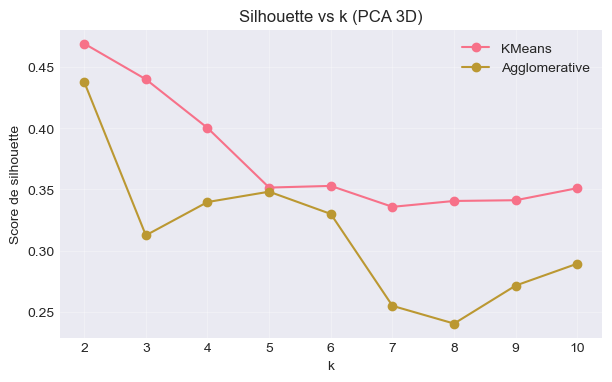

In [35]:
# 5.2 Choix du nombre de clusters et de la méthode (Silhouette)
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Vérifier que X_pca existe (sinon relancer 5.1)
if 'X_pca' not in globals():
    raise RuntimeError("X_pca introuvable. Exécutez d'abord la cellule 5.1 (PCA).")

n_samples = X_pca.shape[0]
k_max_possible = max(2, min(10, n_samples - 1))
k_values = list(range(2, k_max_possible + 1))

results = []
for k in k_values:
    # KMeans
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_km = km.fit_predict(X_pca)
    sil_km = silhouette_score(X_pca, labels_km)
    results.append({'method':'KMeans','k':k,'silhouette':sil_km})
    
    # Agglomerative (Ward)
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_ag = ag.fit_predict(X_pca)
    sil_ag = silhouette_score(X_pca, labels_ag)
    results.append({'method':'Agglomerative','k':k,'silhouette':sil_ag})

df_scores = pd.DataFrame(results)
best_row = df_scores.loc[df_scores['silhouette'].idxmax()]
best_method = best_row['method']
best_k = int(best_row['k'])
best_score = best_row['silhouette']

print("Scores de silhouette par méthode et k :\n", df_scores.pivot(index='k', columns='method', values='silhouette').round(3))
print()
print(f"✅ Meilleur choix: {best_method} avec k={best_k} (silhouette={best_score:.3f})")

# Visualisation des scores
plt.figure(figsize=(7,4))
for method in ['KMeans','Agglomerative']:
    subset = df_scores[df_scores['method']==method]
    plt.plot(subset['k'], subset['silhouette'], marker='o', label=method)
plt.title('Silhouette vs k (PCA 3D)')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Conserver le meilleur choix en variables globales
best_model_name = best_method
best_n_clusters = best_k

### 5.3 Application du clustering sur l'espace PCA et visualisation 3D

In [36]:
# 5.3 Application du clustering choisi et 3D-plot
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import plotly.express as px
import numpy as np
import pandas as pd

# Sécuriser les prérequis
if 'X_pca' not in globals():
    raise RuntimeError("X_pca introuvable. Exécutez d'abord la cellule 5.1 (PCA).")
if 'best_model_name' not in globals() or 'best_n_clusters' not in globals():
    raise RuntimeError("Meilleur modèle non défini. Exécutez d'abord la cellule 5.2.")

# Fit final du meilleur modèle
if best_model_name == 'KMeans':
    model = KMeans(n_clusters=best_n_clusters, random_state=42, n_init=10)
elif best_model_name == 'Agglomerative':
    model = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
else:
    raise ValueError(f"Méthode non reconnue: {best_model_name}")

labels = model.fit_predict(X_pca)
sil = silhouette_score(X_pca, labels)

# Ajouter les labels au df et à df_pca
df['Cluster'] = labels
df_pca['Cluster'] = labels

print(f"Clusters obtenus: {np.bincount(labels)} (k={best_n_clusters})")
print(f"Score de silhouette final: {sil:.3f}")

# Visualisation 3D des clusters sur l'espace PCA
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                    color=df_pca['Cluster'].astype(str),
                    title=f'Clustering {best_model_name} sur PCA (k={best_n_clusters})',
                    labels={'color':'Cluster'})
fig.update_traces(marker=dict(size=4, opacity=0.85))
fig.show()

# Optionnel: centroids en 3D (pour KMeans)
try:
    centers = model.cluster_centers_  # disponible pour KMeans
    centers_df = pd.DataFrame(centers, columns=['PC1','PC2','PC3'])
    import plotly.graph_objects as go
    fig_centers = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=df_pca['Cluster'].astype(str),
                                title=f'Clusters + Centroides (KMeans, k={best_n_clusters})')
    fig_centers.add_trace(go.Scatter3d(x=centers_df['PC1'], y=centers_df['PC2'], z=centers_df['PC3'],
                                       mode='markers', marker=dict(size=8, color='black', symbol='x'),
                                       name='Centroids'))
    fig_centers.show()
except Exception:
    pass

Clusters obtenus: [1328  904] (k=2)
Score de silhouette final: 0.469


---
## 8️) Modélisation Prédictive

### 8.1 Préparation des données pour la prédiction

### 8.2 Entraînement de plusieurs modèles

### 8.3 Comparaison des performances

### 8.4 Analyse détaillée du meilleur modèle

---
## 9️) Conclusions et Recommandations

### 9.1 Synthèse des Résultats

### 9.2 Recommandations Stratégiques

---

## Conclusion Finale

Cette analyse complète a permis de :


### Points Forts de l'Analyse
